# Wine Classifier

Let's guess the quality of a wine from it's characteristics using a Random Forrest Classifier

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import time

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
 
from sklearn.ensemble import RandomForestClassifier

In [19]:
TRAIN_FILE = 'input/winequality-white.csv'

df = pd.read_csv(TRAIN_FILE, sep=';', header=0) 
df.head(n=5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [20]:
#print(df.columns.values)

X = df.drop('quality', 1).values
y = df['quality']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_test.shape)
print(X.shape[0])
print(X_test.shape[0])

(980, 11)
4898
980


In [36]:
classifier = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators = 20)

t_start = time.clock()
classifier.fit(X_train, y_train)
t_end = time.clock()
t_diff = t_end - t_start
train_score = classifier.score(X_train, y_train)
test_score = classifier.score(X_test, y_test)

print('Train score : {}'.format(train_score))
print('Test score : {}'.format(test_score))
print('Time : {} ms'.format(round(t_diff,2)))

Train score : 0.998468606431853
Test score : 0.6387755102040816
Time : 0.22 ms


In [37]:
# Make point predictions on the test set using the fit model.
predictions = classifier.predict(X_test)

preds = [round(p) for p in predictions]  # conversion from a matrix to a list and round the value at the same time
score = 0

for a, p in zip(y_test, preds):
    # print('{} -> {} = {}'.format(a, p, 'Ok' if p-a==0 else 'Nok'))
    if p-a==0:
        score = score+1
        
print('{} on {} = {}%'.format(score, y_test.shape[0], score*100/y_test.shape[0]))

626 on 980 = 63.87755102040816%


In [24]:
matrix = confusion_matrix(y_test, preds, sample_weight=None)
print(matrix)

[[  0   0   7   2   0   0]
 [  0   6  25  20   0   0]
 [  0   1 201  86   7   0]
 [  0   0  57 321  31   0]
 [  0   0   2  85  96   0]
 [  0   0   1  15  10   7]]


[3, 4, 5, 6, 7, 8, 9]


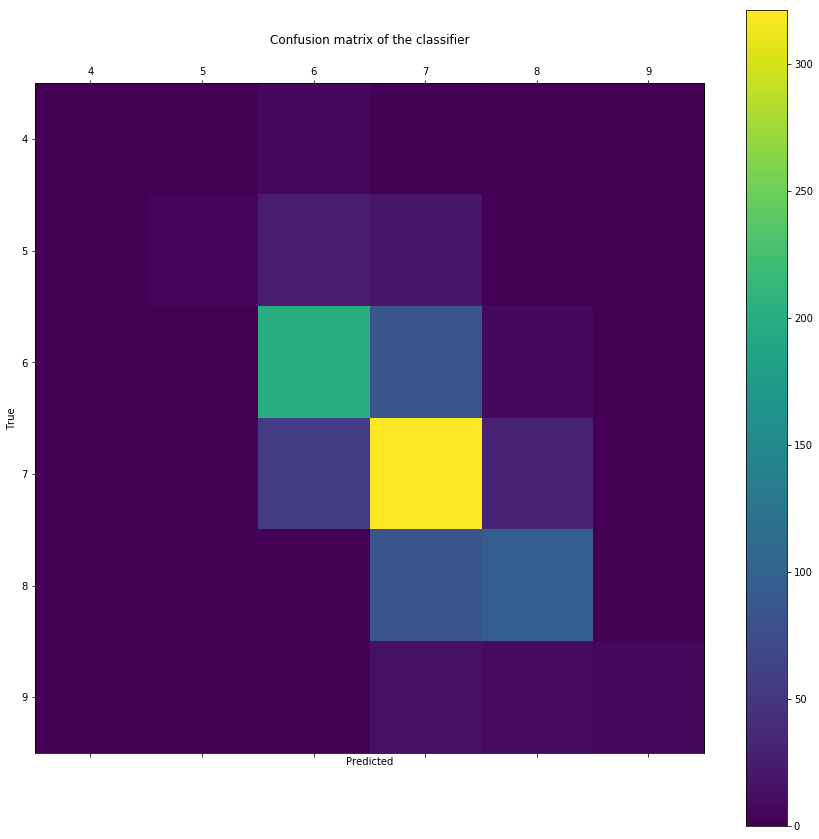

In [42]:
width = 15
height = 15
labels = sorted(df['quality'].unique())

fig = plt.figure(figsize=(width, height))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [54]:
features = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']
for feat, impo in list(zip(features, classifier.feature_importances_)):
    print('{} : {}%'.format(feat, round(impo*100,2)))

fixed_acidity : 7.16%
volatile_acidity : 9.92%
citric_acid : 8.42%
residual_sugar : 8.53%
chlorides : 8.3%
free_sulfur_dioxide : 9.45%
total_sulfur_dioxide : 8.66%
density : 10.41%
pH : 8.63%
sulphates : 8.19%
alcohol : 12.33%
